In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

sci-kit learn의 중요한 기능 중 하나는 분류기에 예측의 불확실정을 추정 할 수 있는 기능

어떤 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지도 중요하지만,
정확한 클래스임을 얼마나 확신 하는 지도 매우 중요할 때가 많다

(1) decision_function
(2) predict_proba


인위적으로 만든 2차원 데이터셋을 가지고 GradientBoostingClassifier 에서
decision_function 과 predict_proba 메서드가 어떤 역할을 하는지 알아 보자

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

X_df = pd.DataFrame(X, columns=['Feature A','Faeture B'])
X_df.head()

,Feature A,Faeture B
0,-0.377487,-0.040077
1,0.027020,-0.484239
2,-0.361188,-1.400702
3,-0.681542,0.005772
4,0.799670,-0.137484


In [3]:
y_df = pd.DataFrame(y, columns=['class'])
y_df.head()

,class
0,1
1,1
2,0
3,1
4,1


In [4]:
y_named = np.array(["blue", "red"])[y]
y_named_df = pd.Series(y_named)
y_named_df.head()

0     red
1     red
2    blue
3     red
4     red
dtype: object

In [5]:
Test = pd.merge(X_df, y_df, left_index=True, right_index=True)
Test.head()

,Feature A,Faeture B,class
0,-0.377487,-0.040077,1
1,0.027020,-0.484239,1
2,-0.361188,-1.400702,0
3,-0.681542,0.005772,1
4,0.799670,-0.137484,1


In [6]:
%matplotlib inline
import seaborn as sns
sns.set()

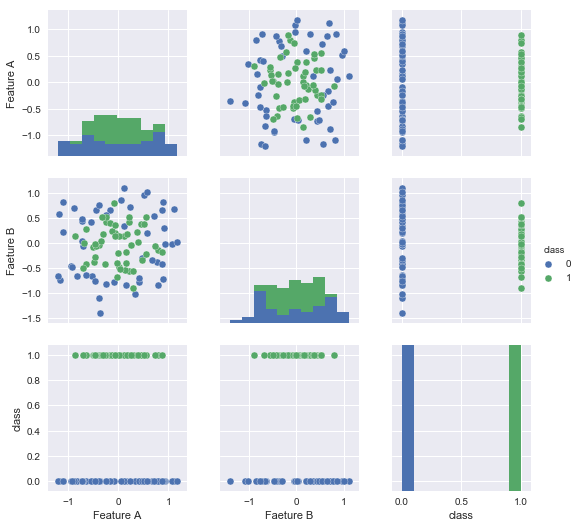

In [7]:
sns.pairplot(Test, hue='class' , size=2.5);

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

2.4.1 결정 함수(decison_function)

- 반환값의 크기는 (n_samples,) 이며, 각 샘플이 하나의 실수 값을 반환한다

In [9]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


이 값은 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도 입니다.
양수 값은 양성 클래스를 의미하며 음수 값은 음성(즉 다른) 클래스를 의미 합니다

In [10]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


결정 부호의 함수만 보고 예측 결과를 알 수 있습니다

In [11]:
print("임계치와 결정 함수 결과 비교:\n{}".format(
      gbrt.decision_function(X_test) > 0))

print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 음성 클래스는 항상 classes 속성의 첫번쨰 원소이고,
양성 클래스는 항상 classes의 두번쨰 원소 입니다.

여기서는 음성 첫번째는 'blue' 이고 양성 두번째는 'red' 입니다.
즉 True 이면 양수 이므로 'red'를 예측하였음을 의미하고, False 이면 음수 이므로 'blue'를 예측 하였음을 의미

In [12]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다: {}".format(
      np.all(pred == gbrt.predict(X_test))))

pred 는 예측 결과와 같다: True


In [13]:
gbrt.classes_

array(['blue', 'red'], 
      dtype='<U4')

In [14]:
gbrt.classes_[greater_zero]

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], 
      dtype='<U4')

In [15]:
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], 
      dtype='<U4')

In [16]:
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0])

In [17]:
greater_zero_boolean = (gbrt.decision_function(X_test) > 0)
greater_zero_boolean

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False], dtype=bool)

In [18]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


decision_function의 출려 범위가 이의의 값이라 이해하긴 어렵습니다.

다음의 예에서 2차원 평면의 모든 점에 대하여 decision_function의 값을 색으로 표현하여
앞에서 본 결정 경계와 함께 그래프로 나타내 보겠습니다.

훈련데이터는 원 모양이고 테스트 데이터는 삼각형 입니다.

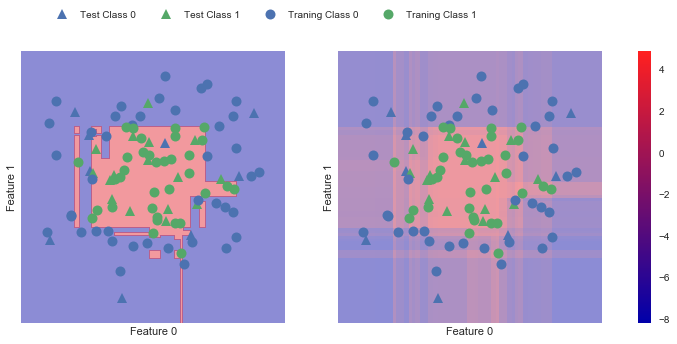

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test Class 0", "Test Class 1", "Traning Class 0",
                "Traning Class 1"], ncol=4, loc=(.1, 1.1))

좌는 결정 경계(decision boundary)이고 우는 결정함수(decision_function) 그래프임

예측한 결과 뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻게 됩니다.
그러나 결정 함수 그래프에서 두 클래스 사이의 경걔를 구분하기는 어렵습니다

2.4.2 예측 확률 (predict_proba)

- predict_proba의 출력은 각 클래스에 대한 확률이고 
- decision_function 의 출력보다 이해하기 더 쉽다
- 이값의 크기는 이진 분류에서 항상 (n_samples, 2) 이다
- 확률 이기 때문에 항상 0에서 1사이의 값을 가지며 클래스에 대한 확률의 합은 1이다

In [20]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [21]:
DF = pd.DataFrame(gbrt.predict_proba(X_test), columns=['class 0', 'class 1'])
DF.head()

,class 0,class 1
0,0.015736,0.984264
1,0.845756,0.154244
2,0.981129,0.018871
3,0.974068,0.025932
4,0.013521,0.986479


In [22]:
total = DF['class 0'] + DF['class 1']
total.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [23]:
pd.concat([DF, total], axis=1).head()

,class 0,class 1,0
0,0.015736,0.984264,1.0
1,0.845756,0.154244,1.0
2,0.981129,0.018871,1.0
3,0.974068,0.025932,1.0
4,0.013521,0.986479,1.0


각 행의 첫번째 원소는 첫번째 클래스의 예측 확률이며, 두번째 원소는 두번째 클래스의 예측 확률 입니다.

In [24]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities: \n{}".format(
      gbrt.predict_proba(X_test[:6])))

Predicted probabilities: 
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


두 클래스의 합은 1이고 두 클래스 중 하나는 50% 이상의확신을 갖게 되는데 바로 그 클래스가 예측 값이 됨

여기서는 비교적 강하게 확신하고 있음

보정 = Calibration

불확실성과 모델의 정확도가 동등하면 이 모델이 보정되었다 함
즉, 보정된 모델에서는 70%의 확신을 가진 예측은 70%의 정확도를 나타낸다.

(주의) 과대적합된 모델은 혹 예측이 잘못 되었더라도 예측의 확신이 장한 편입니다.
그리고 복잡도가 낮은 모델은 예측에 불확실성이 더 많습니다.
따라서 모델과 매개 변수의 설정을 통하여 이런 불확실성과 모델의 정확도를 높여야 합니다.

다음 예에서는 같은 데이터셋을 가지고 결정경계와 클래스 1의 확률을 그려보자

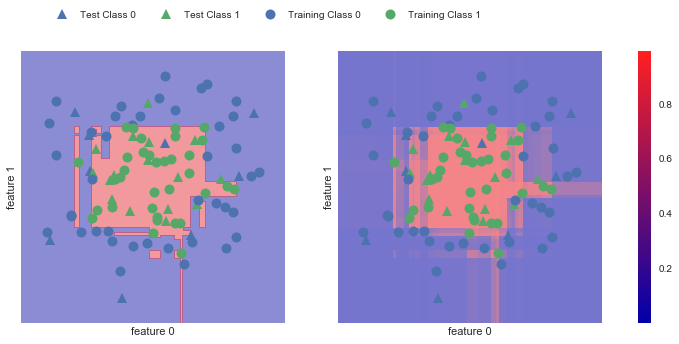

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test Class 0", "Test Class 1", "Training Class 0",
                "Training Class 1"], ncol=4, loc=(.1, 1.1))

2.4.3. 다중 분류에서의 불확실성

iris 데이터셋으로 알아 보자

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# 앞의 일부분 확인
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


다중 분류에서는 decision_function의 결과값의 크기는 (n_samples, n_classes) 입니다.

각 열의 각 클래스에 대한 확신 점수를 나타내는데...
가장 큰 값을 찾아 예측합니다.

In [28]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba의 출력값의 크기도 (n_samples, n_classes) 이며, 클래스 확률의 합은 1입니다.

In [29]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
합: [ 1.  1.  1.  1.  1.  1.]


predict_proba 의 결과에 argmax 함수를 적ㅇ요하여 예측을 재현할 수 있다

In [30]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(
      np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classses_에 연결: {}".format(
      logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


열이 n_classes 인경우 열을 가로 질러 argmax 함수를 적용해 예측 결과를 재현 할 수 있다.

predict 결과와 decision_function이나 predict_proba의 결과를 비교하려면 ...
분류기의 classes_ 속성을 사용해 클래스의 실제 이르을 얻을 수 있어야 한다.